## Máster en Data Science - Series Temporales

# Exploratory Data Analysis
Autor: Ramón Morillo Barrera

## Dataset: Madrid.csv

### Sobre el dataset:
Se trata de una base de datos de registros de transporte público. Cada registro representa la cantidad de personas transportadas en 1 mes, el mes, la ciudad y el código postal, en este caso Madrid y el tipo de transporte (autobús o metro).

### Objetivos del EDA
Esta parte del proyecto tiene como objetivo aplicar técnicas de Análisis Exploratorio de Datos (EDA) para comprender y analizar los patrones presentes en un conjunto de datos relacionado con el transporte público de Madrid. Supongamos que trabajamos para el Consorcio Regional de Transportes de Madrid. Tendremos que realizar un EDA para analizar los patrones presentes en los datos, que nos ayudará a plantear hipótesis y posibles propuestas de negocio para optimizar la red pública de transportes con el objetivo de hacerla lo más eficiente posible en términos de costes. Se identificarán patrones acerca de la cantidad de personas transportadas en el periodo, lo que puede ser utilizado para tomar acciones.

#### Pasos a seguir

Esta parte tendrá principalmente 4 objetivos:
1. Un primer vistazo a los datos en los que se realizaran las transformaciones pertinentes para facilitar nuestro análisis posterior.
2. Un análisis y graficado básico de las series temporales de autobús, metro y ambas en conjunto en todo el periodo disponible.
3. Una descomposición aditiva para visualizar patrones de estacionalidad, tendencia y varianza no explicada.
4. La conclusión final, generación de hipótesis que iremos contrastando a lo largo del proyecto con las predicciones a realizar para nuestros datos.

***
## Business Case

**Antecedentes**

La Comunidad de Madrid, una de las regiones más densamente pobladas y dinámicas de España, depende de su sistema de transporte público para facilitar la movilidad de millones de personas diariamente. Con el crecimiento constante de la población y el incremento en la actividad tras eventos disruptivos como la pandemia de COVID-19, surge la necesidad de optimizar la planificación y operación de la red de transporte público. Para ello, la predicción precisa de la demanda futura es crítica para garantizar un servicio eficiente, reducir costes operativos y mantener la sostenibilidad del sistema.

**Problema**

El transporte público enfrenta retos significativos debido a fluctuaciones en la demanda y patrones estacionales complejos. Una planificación ineficaz puede derivar en un uso ineficiente de recursos, sobrecostes y deterioro del servicio, lo que impacta tanto a los operadores como a los usuarios. Además, es crucial identificar y contrastar patrones de tendencia y estacionalidad para tomar decisiones informadas.

**Objetivos**
1. Predicción de la Demanda: Utilizar modelos avanzados como ARIMA, ETS, THETA y PROPHET para predecir la demanda futura de transporte público, basada en datos históricos de viajeros.
2. Análisis de Patrones: Contrastar hipótesis relacionadas con la estacionalidad y las tendencias observadas en los datos para comprender mejor los factores que afectan la demanda.
3. Optimización de Recursos: Minimizar costes operativos y mejorar la eficiencia de la red de transporte público mediante una planificación basada en datos.

**Alcance del Proyecto**

Se analizarán los datos mensuales del archivo Madrid.csv, que contienen el número de viajeros transportados en metro y autobuses desde enero de 2012 hasta septiembre de 2024. Los modelos seleccionados se evaluarán en términos de precisión y capacidad predictiva, y se contrastarán los patrones de comportamiento estacional y tendencia detectados.

**Beneficios Esperados**
- Eficiencia Operativa: Reducción de costes a través de la optimización del despliegue de recursos en función de la demanda esperada.
- Satisfacción del Usuario: Mejora en la calidad del servicio al prever y abordar adecuadamente picos de demanda.
- Sostenibilidad: Implementación de estrategias más sostenibles al alinear recursos con las necesidades reales.

**Plan de Acción**
1. Preparación de los Datos: Limpieza y análisis exploratorio del conjunto de datos Madrid.csv.
2. Implementación de Modelos: Entrenamiento de los modelos ARIMA, ETS, THETA, PROPHET, etc con los datos históricos.
3. Validación: Evaluación del desempeño de los modelos mediante métricas de error predictivo (RMSE, MAE y MAPE).
4. Análisis de Hipótesis: Identificación y contrastación de patrones estacionales y de tendencia.

***

## EDA inicial

In [1]:
# importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# importo el dataset con la codificación correcta
ruta_output = '../data/raw/Madrid.csv'
madrid = pd.read_csv(ruta_output, encoding='ISO-8859-1', sep=';')

In [3]:
# muestro las primeras filas
madrid

,Viajeros y tasas,TIPO DE TRANSPORTE,Ciudad,Periodo,Total
0,Viajeros transportados,Transporte urbano regular por autobs,28079 Madrid,2024M09,40.130
1,Viajeros transportados,Transporte urbano regular por autobs,28079 Madrid,2024M08,25.805
2,Viajeros transportados,Transporte urbano regular por autobs,28079 Madrid,2024M07,34.079
3,Viajeros transportados,Transporte urbano regular por autobs,28079 Madrid,2024M06,40.315
4,Viajeros transportados,Transporte urbano regular por autobs,28079 Madrid,2024M05,42.456
...,...,...,...,...,...
301,Viajeros transportados,Urbano por metro,28079 Madrid,2012M05,54.774
302,Viajeros transportados,Urbano por metro,28079 Madrid,2012M04,49.995
303,Viajeros transportados,Urbano por metro,28079 Madrid,2012M03,56.719
304,Viajeros transportados,Urbano por metro,28079 Madrid,2012M02,55.280


#### Análisis general del Dataset

Vamos a observar las dimensiones del dataset, además de sus tipos de variables y cantidad de valores nulos.

In [4]:
# tamaño del dataset
print(madrid.shape, madrid.drop_duplicates().shape)

(306, 5) (306, 5)


In [5]:
# columnas
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Viajeros y tasas    306 non-null    object 
 1   TIPO DE TRANSPORTE  306 non-null    object 
 2   Ciudad              306 non-null    object 
 3   Periodo             306 non-null    object 
 4   Total               306 non-null    float64
dtypes: float64(1), object(4)
memory usage: 12.1+ KB


In [6]:
# valores nulos
madrid.isna().sum()

Viajeros y tasas      0
TIPO DE TRANSPORTE    0
Ciudad                0
Periodo               0
Total                 0
dtype: int64

In [7]:
# valores estadísticos
madrid.describe()

,Total
count,306.000000
mean,40.619869
std,12.000546
min,3.117000
25%,33.690000
50%,38.432000
75%,50.252250
max,66.151000


Observamos que este dataset tiene 5 columnas y 306 registros, ninguno duplicado ni valores nulos. El total de pasajeros es de tipo entero, las demás variables son de tipo object. Tendremos que realizar varias transformaciones para los datos así de un primer vistazo:
1. Eliminar la columna `Viajeros y tasas` ya que no nos aporta ninguna información relevante.
2. Eliminar el código postal de la columna `Ciudad` ya que especifica que es Madrid.
3. Convertir los datos de la columna `TIPO DE TRANSPORTE` para que solo contenga autobus o metro.
4. Convertir los datos de la columna `Periodo` a tipo fecha y darle formato adecuado.

Estas transformaciones iniciales son necesarias para poder visualizar las distintas series temporales.

In [8]:
# 1. Eliminar columnas no necesarias
madrid = madrid.drop(columns=['Viajeros y tasas'])

In [9]:
# 2. Eliminar código postal
madrid['Ciudad'] = 'Madrid'

In [10]:
# 3. Reemplazar valores en la columna TIPO DE TRANSPORTE
madrid['TIPO DE TRANSPORTE'] = madrid['TIPO DE TRANSPORTE'].replace({
    'Transporte urbano regular por autobs': 'autobus',
    'Urbano por metro': 'metro'
})

In [11]:
# 4. Convertir la columna Periodo a formato fecha
madrid['Periodo'] = pd.to_datetime(madrid['Periodo'], format='%YM%m')

In [12]:
madrid

,TIPO DE TRANSPORTE,Ciudad,Periodo,Total
0,autobus,Madrid,2024-09-01,40.130
1,autobus,Madrid,2024-08-01,25.805
2,autobus,Madrid,2024-07-01,34.079
3,autobus,Madrid,2024-06-01,40.315
4,autobus,Madrid,2024-05-01,42.456
...,...,...,...,...
301,metro,Madrid,2012-05-01,54.774
302,metro,Madrid,2012-04-01,49.995
303,metro,Madrid,2012-03-01,56.719
304,metro,Madrid,2012-02-01,55.280


A continuación, después de haber realizado las transformaciones iniciales, crearé 3 dataframes distintos que me faciliten el trabajo a lo largo de todo el proyecto. 
1. Un dataframe solo con la serie de autobus
2. Un dataframe solo con la serie de metro
3. Un dataframe que combina ambas series y las suma

In [13]:
# DataFrame solo con el tipo de transporte autobus
df_autobus = madrid[madrid['TIPO DE TRANSPORTE'] == 'autobus']

# DataFrame solo con el tipo de transporte metro
df_metro = madrid[madrid['TIPO DE TRANSPORTE'] == 'metro'].reset_index(drop=True)

# DataFrame con la suma de ambos tipos de transporte
df_combined = madrid.groupby('Periodo').agg({'Total': 'sum'}).reset_index()
df_combined['TIPO DE TRANSPORTE'] = 'autobus y metro'
df_combined['Ciudad'] = 'Madrid'

### Series mensuales

A continuación, se van a establecer las series mensuales para el transporte en autobús, metro y combinado.

In [14]:
# Ordenamos de manera ascendente el periodo para graficar

df_autobus_month = df_autobus.sort_values(by='Periodo', ascending=True).set_index('Periodo')
df_autobus_month

,TIPO DE TRANSPORTE,Ciudad,Total
Periodo,,,
2012-01-01,autobus,Madrid,36.564
2012-02-01,autobus,Madrid,36.692
2012-03-01,autobus,Madrid,38.554
2012-04-01,autobus,Madrid,33.174
2012-05-01,autobus,Madrid,37.975
...,...,...,...
2024-05-01,autobus,Madrid,42.456
2024-06-01,autobus,Madrid,40.315
2024-07-01,autobus,Madrid,34.079


In [15]:
df_metro_month = df_metro.sort_values(by='Periodo', ascending=True).set_index('Periodo')
df_metro_month

,TIPO DE TRANSPORTE,Ciudad,Total
Periodo,,,
2012-01-01,metro,Madrid,54.335
2012-02-01,metro,Madrid,55.280
2012-03-01,metro,Madrid,56.719
2012-04-01,metro,Madrid,49.995
2012-05-01,metro,Madrid,54.774
...,...,...,...
2024-05-01,metro,Madrid,62.333
2024-06-01,metro,Madrid,59.458
2024-07-01,metro,Madrid,52.445


In [16]:
df_combined_month = df_combined.set_index('Periodo').sort_index(ascending=True)
df_combined_month

,Total,TIPO DE TRANSPORTE,Ciudad
Periodo,,,
2012-01-01,90.899,autobus y metro,Madrid
2012-02-01,91.972,autobus y metro,Madrid
2012-03-01,95.273,autobus y metro,Madrid
2012-04-01,83.169,autobus y metro,Madrid
2012-05-01,92.749,autobus y metro,Madrid
...,...,...,...
2024-05-01,104.789,autobus y metro,Madrid
2024-06-01,99.773,autobus y metro,Madrid
2024-07-01,86.524,autobus y metro,Madrid


### Series trimestrales

Una vez tenemos las series mensuales, crearemos las series trimestrales para los 3 mismos dataframes. Autobús, metro y combinados

In [17]:
# Crear el dataframe df_autobus_trim agrupando por trimestre
df_autobus_trim = df_autobus.set_index('Periodo').resample('QE').sum()

# Transformar las columnas
df_autobus_trim['TIPO DE TRANSPORTE'] = 'autobus'
df_autobus_trim['Ciudad'] = 'Madrid'

df_autobus_trim.head()

,TIPO DE TRANSPORTE,Ciudad,Total
Periodo,,,
2012-03-31,autobus,Madrid,111.810
2012-06-30,autobus,Madrid,107.809
2012-09-30,autobus,Madrid,80.616
2012-12-31,autobus,Madrid,105.252
2013-03-31,autobus,Madrid,101.654


In [18]:
# Crear el dataframe df_metro_trim agrupando por trimestre
df_metro_trim = df_metro.set_index('Periodo').resample('QE').sum()

# Transformar las columnas
df_metro_trim['TIPO DE TRANSPORTE'] = 'metro'
df_metro_trim['Ciudad'] = 'Madrid'

df_metro_trim.head()

,TIPO DE TRANSPORTE,Ciudad,Total
Periodo,,,
2012-03-31,metro,Madrid,166.334
2012-06-30,metro,Madrid,156.785
2012-09-30,metro,Madrid,124.073
2012-12-31,metro,Madrid,154.360
2013-03-31,metro,Madrid,143.963


In [19]:
# Crear el dataframe df_autobus_trim agrupando por trimestre
df_combined_trim = df_combined.set_index('Periodo').resample('QE').sum()

# Transformar las columnas
df_combined_trim['TIPO DE TRANSPORTE'] = 'autobus y metro'
df_combined_trim['Ciudad'] = 'Madrid'

df_combined_trim.head()

,Total,TIPO DE TRANSPORTE,Ciudad
Periodo,,,
2012-03-31,278.144,autobus y metro,Madrid
2012-06-30,264.594,autobus y metro,Madrid
2012-09-30,204.689,autobus y metro,Madrid
2012-12-31,259.612,autobus y metro,Madrid
2013-03-31,245.617,autobus y metro,Madrid


Una vez realizadas estas transformaciones, estamos preparados para graficar las series temporales. Veremos las series temporales tanto de autobus y metro como la suma de ambas.

***

## Series temporales

Voy a graficar las series temporales tanto de manera mensual como de manera trimestral. Comentaré conclusiones al finalizar el graficado de todas las series.

### Autobús

<Axes: xlabel='Periodo'>

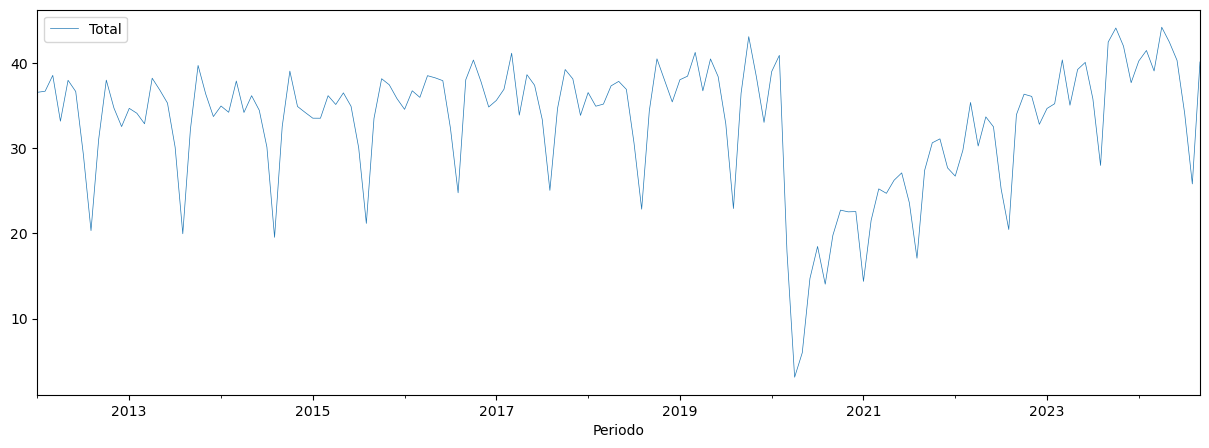

In [21]:
# Serie mensual de pasajeros en autobús
df_autobus_month.plot(linewidth=0.5, figsize=(15, 5))


<Axes: xlabel='Periodo'>

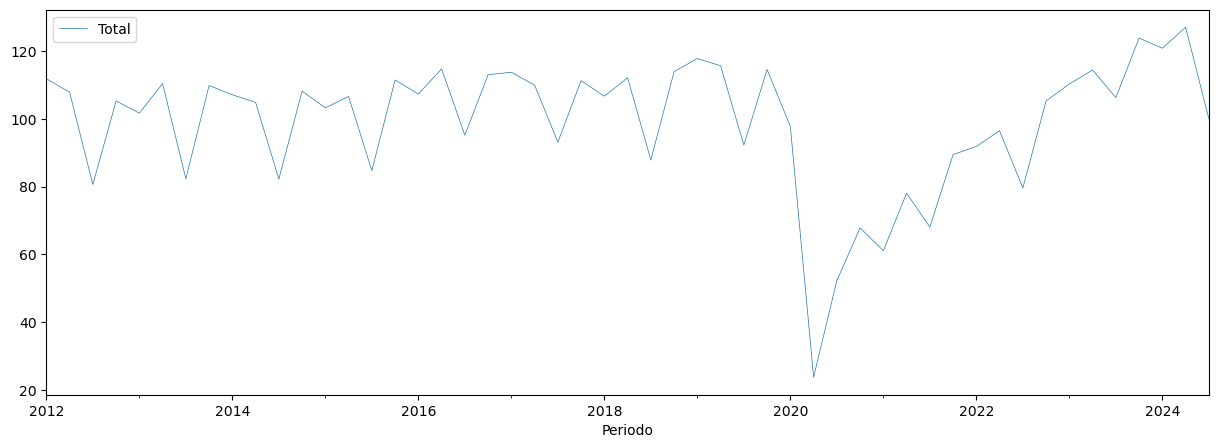

In [22]:
# Serie trimestral de pasajeros en autobús
df_autobus_trim.plot(linewidth=0.5, figsize=(15, 5))

### Metro

<Axes: xlabel='Periodo'>

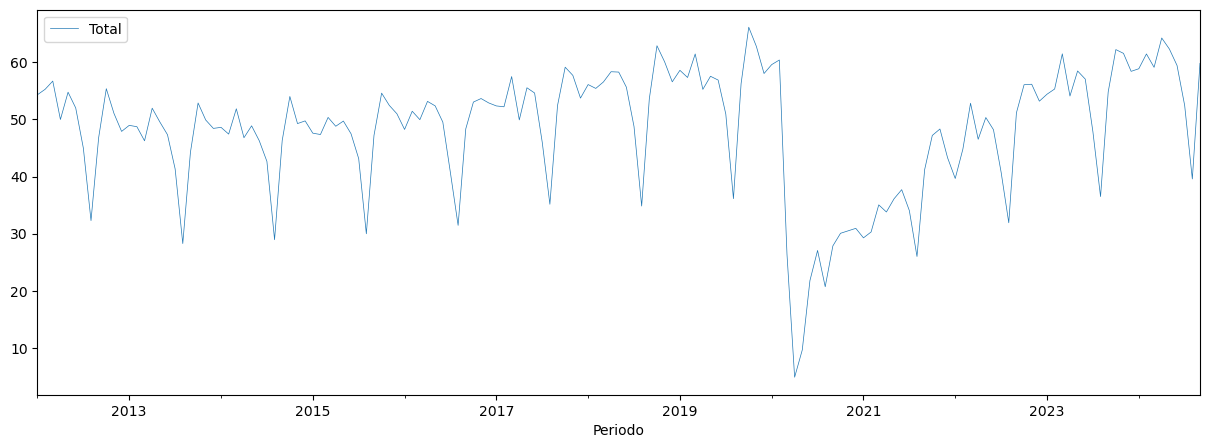

In [23]:
# Serie mensual de pasajeros en metro
df_metro_month.plot(linewidth=0.5, figsize=(15, 5))

<Axes: xlabel='Periodo'>

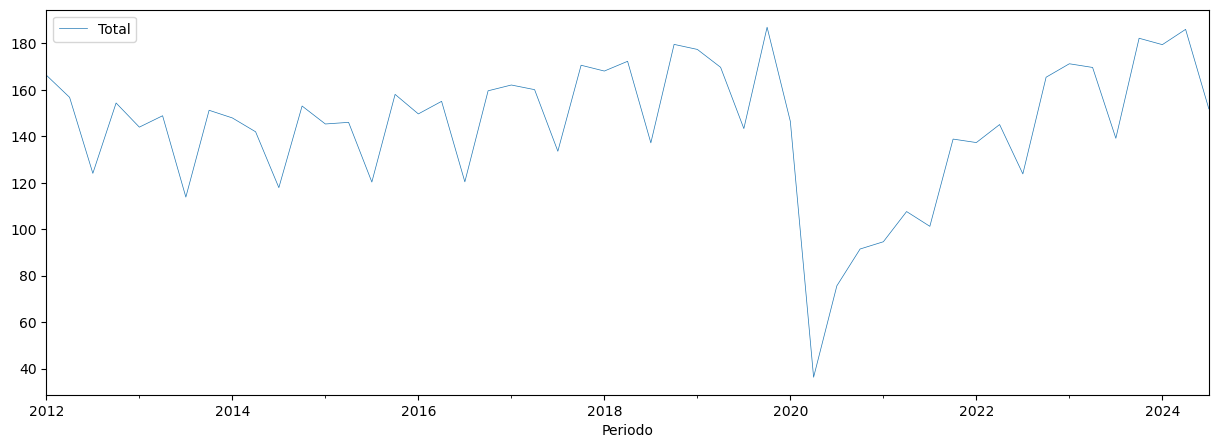

In [25]:
# Serie trimestral de pasajeros en metro
df_metro_trim.plot(linewidth=0.5, figsize=(15, 5))

### Combinada

<Axes: xlabel='Periodo'>

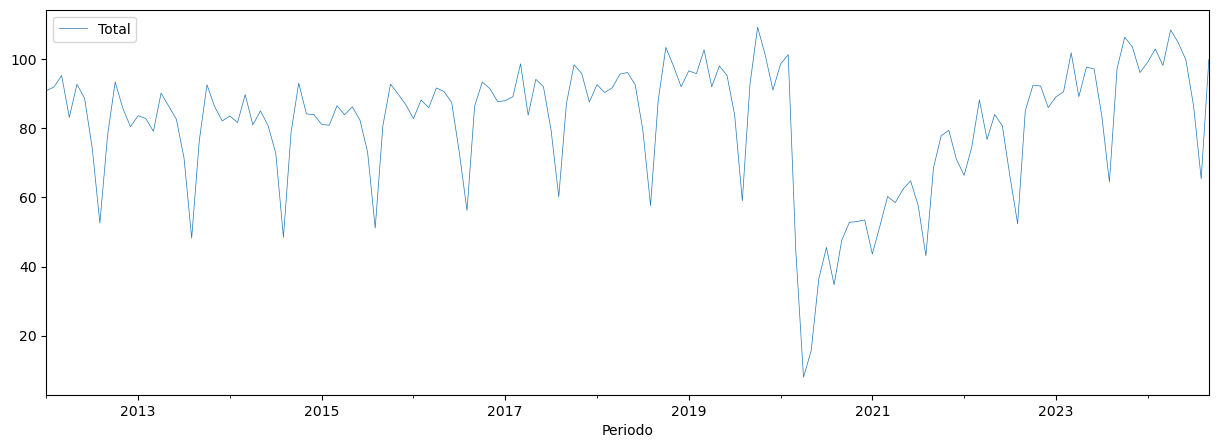

In [24]:
# Serie mensual de pasajeros en autobús y metro
df_combined_month.plot(linewidth=0.5, figsize=(15, 5))

<Axes: xlabel='Periodo'>

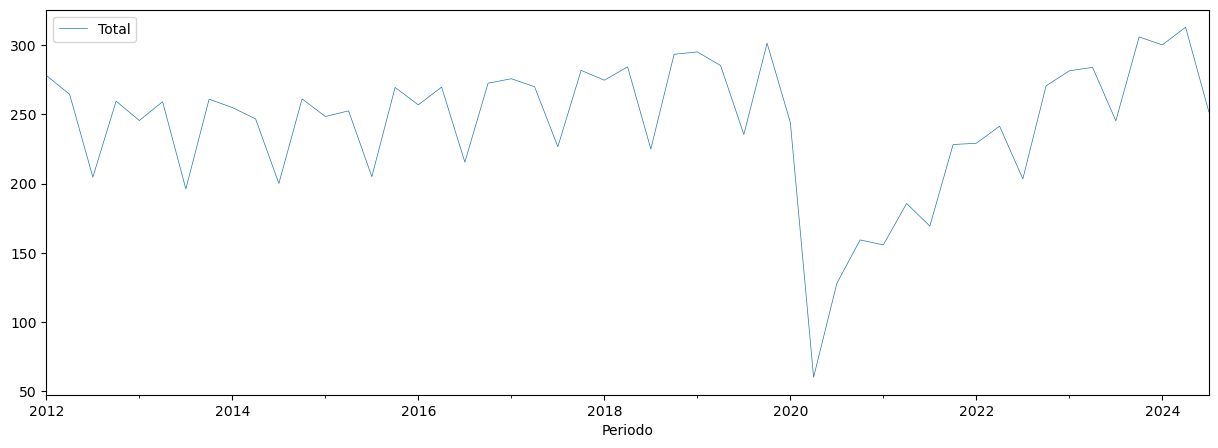

In [26]:
# Serie trimestral de pasajeros en autobús y metro
df_combined_trim.plot(linewidth=0.5, figsize=(15, 5))

A primera vista, todas las series temporales son muy parecidas, tanto en tendencia como en estacionalidad. Esto se debe a que gran parte del transporte público de la ciudad de Madrid está muy bien interconectado, ofreciendo rutas tanto en metro como autobús. Permitiendo a los pasajeros combinar ambos tipos de transporte público para llegar a sus destinos de la manera más eficiente posible, lo que se traduce en un ahorro de tiempo. A priori, esta cuestión es un punto a favor ya que si aumenta un tipo de transporte, tenderá a aumentar el otro (aunque para confirmarlo al 100% habría que estudiar las correlación). Por lo que, si aumentan los pasajeros, inherentemente aumentarán los ingresos del Consorcio Regional de Transportes de Madrid.

Observamos que desde el 2012 hasta principios de 2019 la evolución de la tendencia en todas las series temporales ha sido ligeramente creciente, observando una drástica disminución de viajeros en marzo de 2019 cuando se declaró el estado de alarma, llegando a recuperar sus valores normales a finales del año 2023. Este patrón atípico fue claramente inesperado, pero nos proporciona información importante para poder aplicar medidas que se podrían haber tomado para gestionar de manera eficiente los costes de la red de transportes de Madrid.

A su vez, a primera vista se observan patrones estacionales, probablemente en los meses de verano, temporada de vacaciones donde instituciones educativas y muchas empresas cierran, disminuyendo el total de pasajeros en el transporte público de Madrid. Esto lo estudiaremos a continuación.

***

## Estacionalidad

### Autobús

Text(0.5, 1.0, 'Comportamiento Estacional de Pasajeros en Autobús')

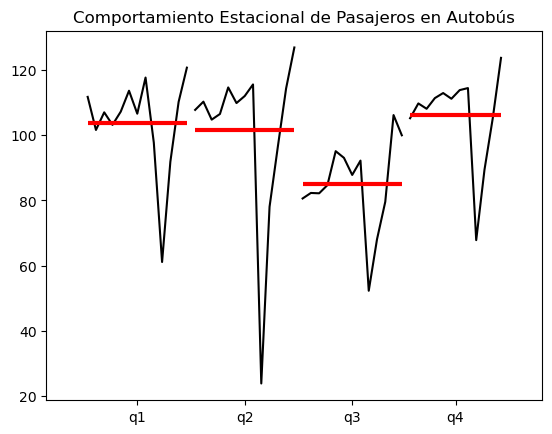

In [27]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(df_autobus_trim['Total'],ax=ax)
ax.set_title('Comportamiento Estacional de Pasajeros en Autobús')

### Metro

Text(0.5, 1.0, 'Comportamiento Estacional de Pasajeros en Metro')

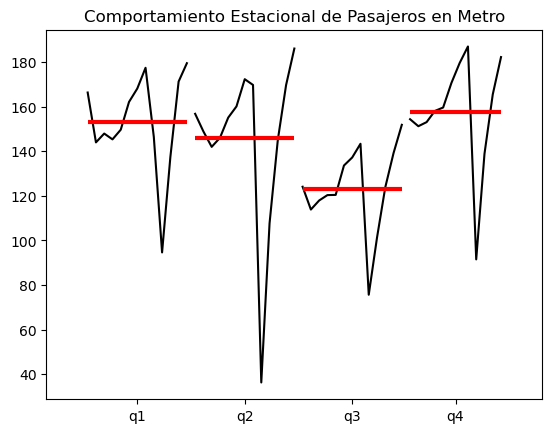

In [28]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(df_metro_trim['Total'],ax=ax)
ax.set_title('Comportamiento Estacional de Pasajeros en Metro')

### Combinada

Text(0.5, 1.0, 'Comportamiento Estacional de Pasajeros en Autobús y Metro')

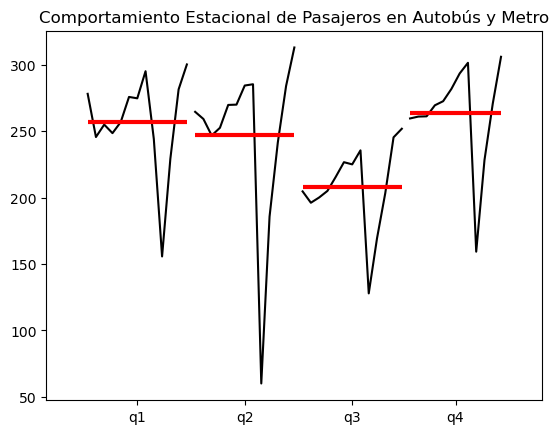

In [29]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(df_combined_trim['Total'],ax=ax)
ax.set_title('Comportamiento Estacional de Pasajeros en Autobús y Metro')

Como comentabamos anteriormente, se observa un claro patrón estacional tanto en autobús como en metro en el tercer trimestre del año. Esto principalmente puede deberse al cierre de las instituciones educativas por motivo de finalización del periodo escolar, vacaciones de empleados en empresas, menor actividad empresarial y disminución de la población en la ciudad debido a viajes por vacaciones.

Son patrones a tener en cuenta para aplicar medidas económicas que optimicen los ingresos y costes del transporte público, todas ellas las expondré en el informe generado.

***

## Descomposición aditiva

A continuación, realizaré una descomposición aditiva para las series trimestrales de los 3 dataframes, con ello podremos observar de un vistazo el comportamiento de la tendencia, los patrones estacionales y la varianza no explicada por medio de los residuos.

### Autobús

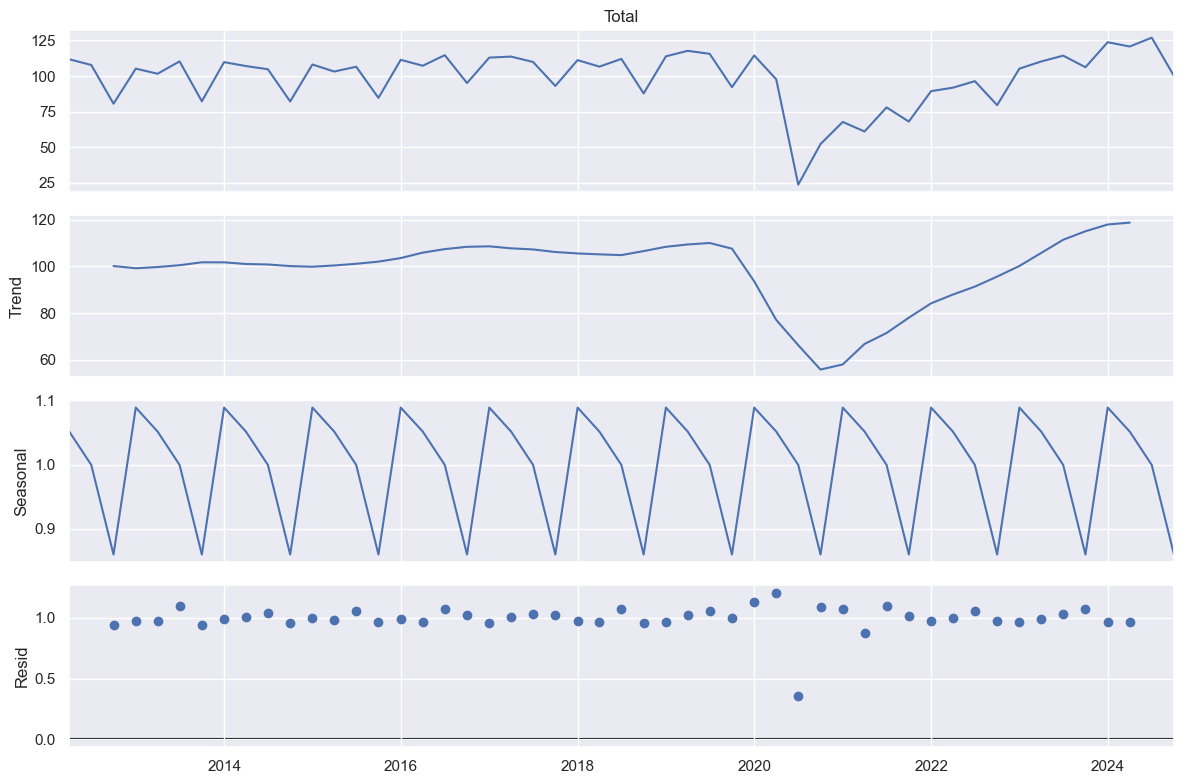

In [30]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(df_autobus_trim['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

### Metro

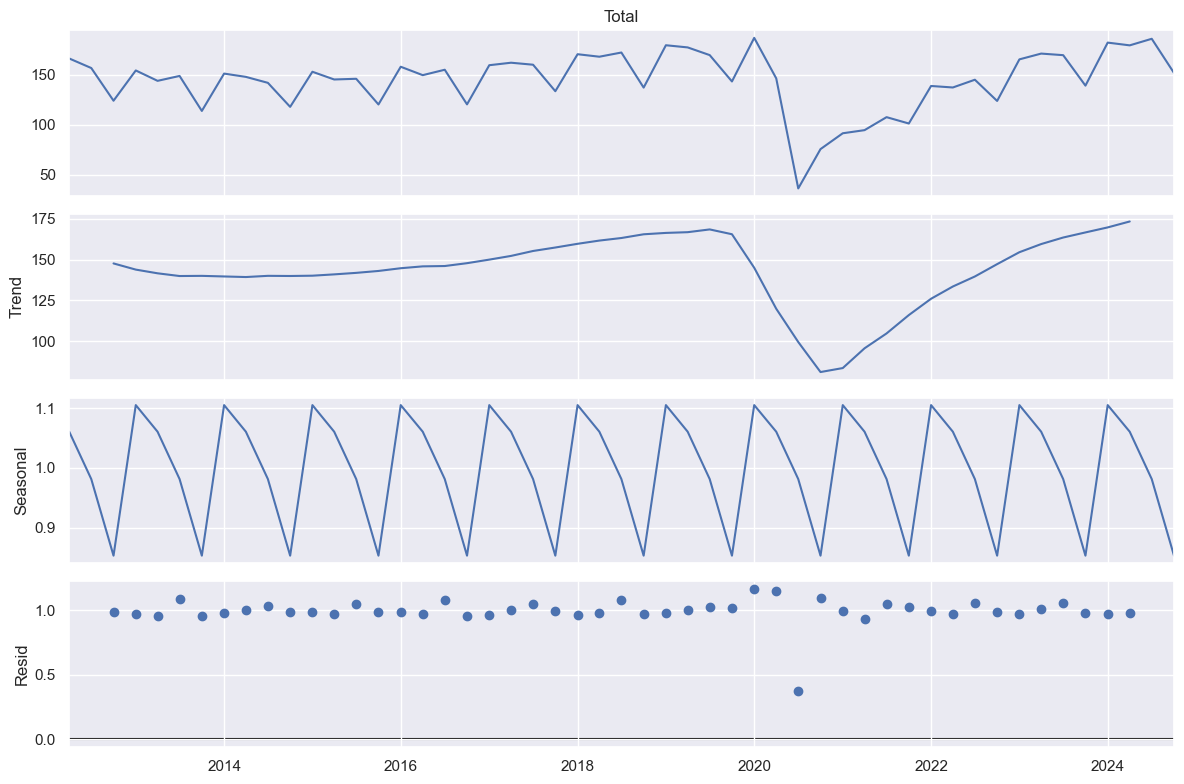

In [31]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(df_metro_trim['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

### Combinada

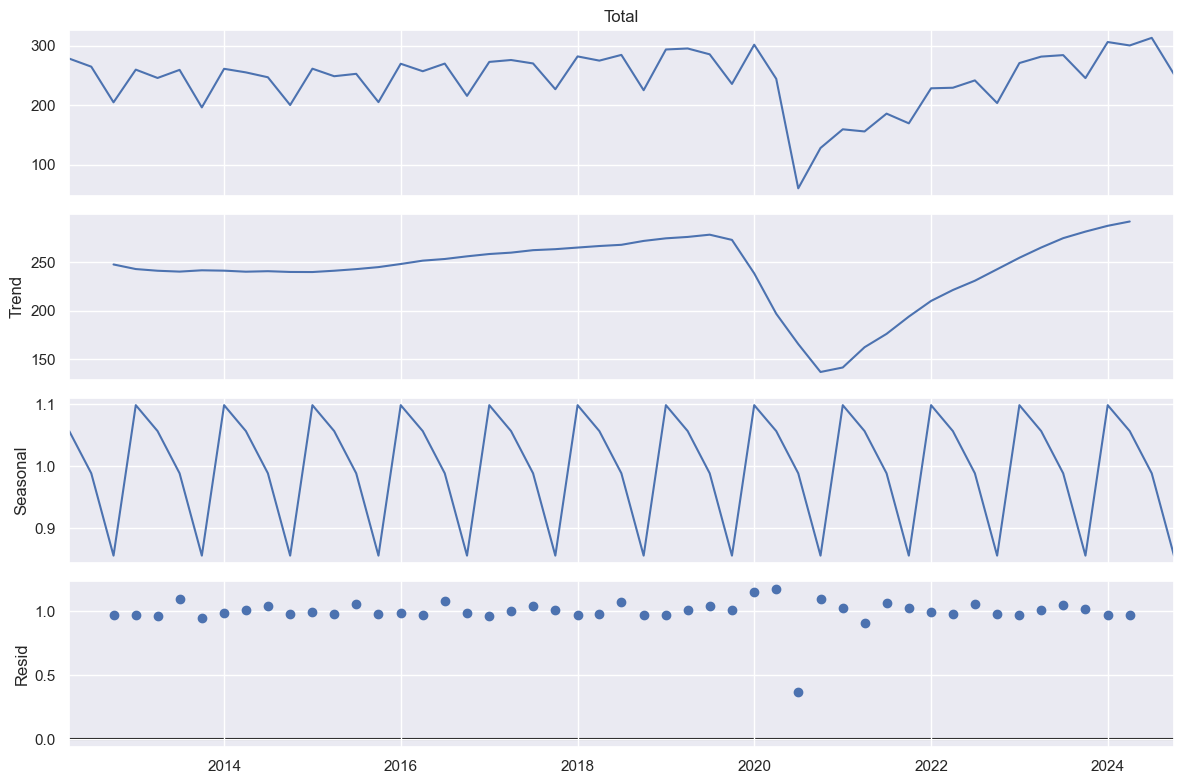

In [32]:
sns.set(rc={'figure.figsize':(12, 8)})
decomposition = seasonal_decompose(df_combined_trim['Total'], 
                                   model='multiplicative', 
                                   period=4)
decomposition.plot();

Como hemos comentado antes, se observa un ligero cremiento de la tendencia, que se ve afectado por la pandemia de COVID-19, la cuál se va recuperando hasta alcanzar los valores anteriores a la pandemia a finales del año 2023. 

En cuanto al componente estacional observamos lo anteriormente comentado. Existe una clara disminución del uso del transporte público de Madrid en los meses de verano, temporada vacacional.

En cuanto al residuo los puntos parecen distribuirse de manera consistente en torno a un valor cercano a 1, aunque hay ciertas desviaciones notables (como en 2020, con un residuo significativamente bajo). La pandemia de COVID-19, que afectó la demanda de transporte público. Este tipo de residuo fuera de lo normal sugiere que el modelo no pudo prever adecuadamente eventos excepcionales. 

***

## Ventana móvil

Como hemos visto que las series son muy parecidas entre sí, voy a aplicar una ventana móvil para la serie combinada y graficarla en conjunto con la serie original, veremos las diferencias y comentaré los resultados a continuación.

In [33]:
df_combined_trim_2q = df_combined_trim['Total'].rolling(2).mean().rename('Total 2quarter')
df_combined_trim_2q.head()


Periodo
2012-03-31         NaN
2012-06-30    271.3690
2012-09-30    234.6415
2012-12-31    232.1505
2013-03-31    252.6145
Freq: QE-DEC, Name: Total 2quarter, dtype: float64

<Axes: xlabel='Periodo'>

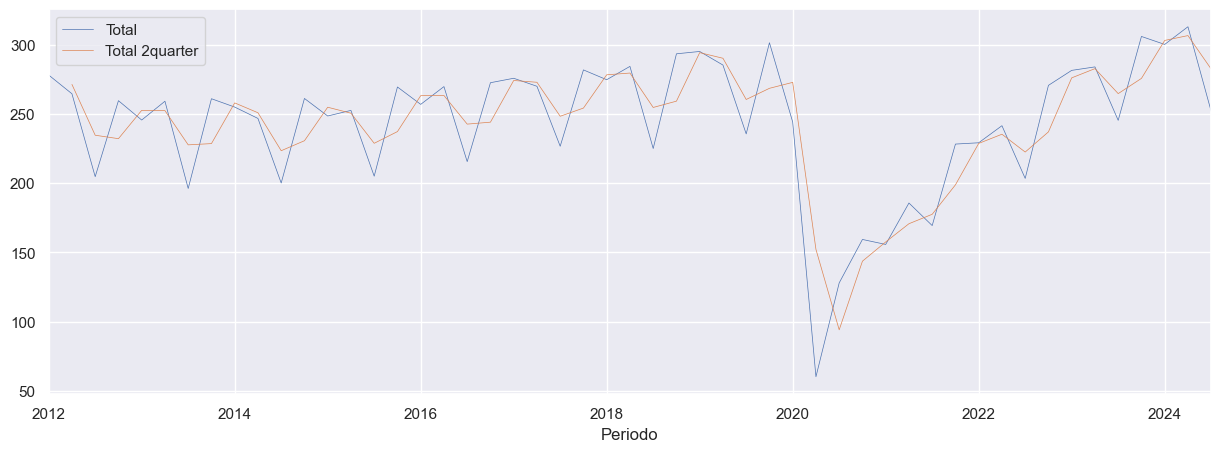

In [34]:
df_combined_trim_concat = pd.concat([df_combined_trim, df_combined_trim_2q], axis=1)
df_combined_trim_concat.plot(linewidth=0.5, figsize=(15, 5))

Se observa en la representación a simple vista que la tendencia se suaviza, ya que se calcula la media de los ingresos cada dos periodos, por tanto, la variación no es tan acentuada como se observa en la serie temporal original.

***

## Diferenciación

También aplicaré diferenciación de la serie temporal para eliminar la tendencia.

In [35]:
df_combined_trim_diff = df_combined_trim['Total'].diff()

df_combined_trim_diff.head()

Periodo
2012-03-31       NaN
2012-06-30   -13.550
2012-09-30   -59.905
2012-12-31    54.923
2013-03-31   -13.995
Freq: QE-DEC, Name: Total, dtype: float64

<Axes: xlabel='Periodo'>

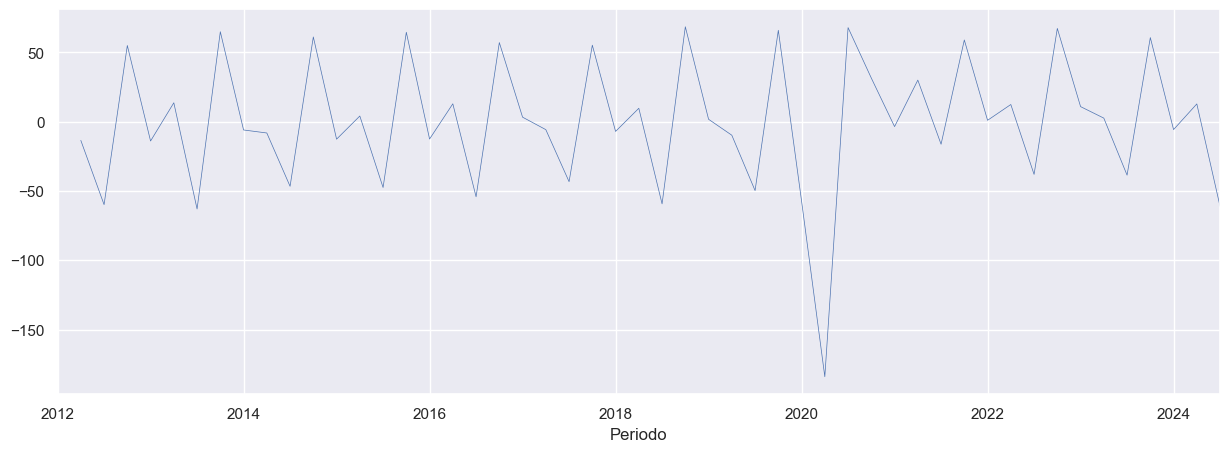

In [36]:
df_combined_trim_diff.plot(linewidth=0.5, figsize=(15, 5))

Se observa un crecimiento estable salvo en la época de la pandemia generada por COVID-19 el cuál disminuyó drásticamente. Asu vez, se observan los patrones estacionales comentados anteriormente. 

Con la diferenciación aplicamos estacionariedad, necesaria como veremos más adelante al aplicar modelos de predicción ARIMA.

***

## Conclusiones EDA

En base a este análisis exploratorio de los datos de manera inicial podemos extraer las siguientes conclusiones que nos servirán de base para nuestras predicciones futuras y que tendremos en cuenta a la hora de redactar el informe.

- **Análisis inicial:**

1. ¿Cuál ha sido la evolución de los viajeros en metro y autobús en los
últimos 12 años?

La evolución de los viajeros en metro y autobús en la serie observada correspondiente a los últimos 12 años (2012-2014) ha sido ligeramente creciente, observando una drástica caída en la época del COVID-19 (marzo 2019), llegándose a recuperar a finales de 2023 para continuar con su tendencia creciente.

2. ¿Qué patrones de estacionalidad se pueden observar en las dos series?

En ambas series se observan patrones de estacionalidad en el tercer trimestre del año, se observa una clara disminución de la demanda de transporte público que podría deberse a las vacaciones de verano y la baja actividad empresarial.

- **Descomposición:**

1. ¿Cómo se separa cada serie en sus componentes de tendencia, estacionalidad y residual?

Ambas series se separan de una manera similar, se observa una tendencia ligeramene creciente, una estacionalidad en el tercer trimestre de cada año y un residuo que parece distribuirse de manera consistente en torno a un valor cercano a 1, salvo en la época del COVID-19, lo que sugiere que el modelo no es capaz de explicar esa situación excepcional. Es comprensible debido a la incertidumbre a largo plazo que tenemos en nuestra sociedad.

2. ¿Qué diferencia hay entre los patrones estacionales del metro y del
autobús?

No se nota mucha diferencia en los patrones estacionales de la demanda de pasajeros en metro y autobús, en ambas series disminuyen en el tercer trimestre de cada año por lo comentado anteriormente. 

La única diferencia notable es que el metro alberga un mayor número de pasajeros promedio que el autobús. Esto puede deberse a que la infraestructura del mismo es más grande y está mejor comunicada.


- **Conclusiones generales**

1. Tanto la serie de autobús como la de metro son muy parecidas aunque el metro cuenta con una mayor cantidad de pasajeros, según mi hipótesis, se debe a la buena conectividad que tiene la red de transporte público del Consorcio Regional de Transportes de Madrid, la cuál proporciona diferentes rutas combinables gracias a los intercambiadores situados en diferentes puntos de la ciudad los cuales permiten que los pasajeros tomen la ruta más corta combinando ambos medios de transporte. Esto proporciona una mayor afluencia de pasajeros en el tiempo, lo que se traduce en un aumento de los ingresos.
2. Se nota una caída en la demanda de transporte público en el mes de marzo del año 2023 debido al decreto del Estado de alarma causado por la pandemia del virus COVID-19, situación a tener en cuenta a la hora de tomar medidas económicas que gestionen la rápida caída de la demanda con el objetivo de optimizar la eficiencia de la red de transporte público de Madrid, así como los costes ocasionados y los ingresos recibidos.
3. Observamos un claro componente estacional en ambas series en el tercer cuatrimestre del año, según mi hipóteisis esta estacionalidad que causa una disminución de la demanda de transporte público se debe al cierre de instituciones educativas con motivo de finalización del curso escolar, baja actividad empresarial y disminución de la población en ese periodo fruto del periodo vacional el cuál gozan los trabajadores.

A partir de estas tres conclusiones observadas después de una correcta limpieza y preparación de los datos, para su posterior análisis procederé a guardar los datos en archivos .csv distintos y dar por finalizado este notebook para continuar en los siguientes con las predicciones de nuestros diversos modelos.

In [37]:
df_autobus_month.to_csv('../data/processed/Madrid_autobus_month.csv', index=True)
df_metro_month.to_csv('../data/processed/Madrid_metro_month.csv', index=True)
df_combined_month.to_csv('../data/processed/Madrid_combined_month.csv', index=True)

df_autobus_trim.to_csv('../data/processed/Madrid_autobus_trim.csv', index=True)
df_metro_trim.to_csv('../data/processed/Madrid_metro_trim.csv', index=True)
df_combined_trim.to_csv('../data/processed/Madrid_combined_trim.csv', index=True)